# Notebook 03: Statistical Anomaly Detection Models

**Objective**: Train and evaluate classical ML models for anomaly detection

**Models**:
1. **Isolation Forest**: Tree-based, fast, works well with high-dimensional data
2. **Local Outlier Factor (LOF)**: Density-based, good at finding local anomalies

**Contents**:
1. Load and prepare data
2. Train both models
3. Evaluate and compare performance
4. Visualize predictions and errors
5. Analyze false positives and false negatives

In [1]:
# Import libraries
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from models.statistical_models import IsolationForestDetector, LOFDetector, compare_models
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load and Prepare Data

In [2]:
# Load scaled featured data
df = pd.read_csv('../data/processed/scaled_featured_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nAnomaly distribution:")
print(df['anomaly'].value_counts())
print(f"\nAnomaly ratio: {df['anomaly'].mean():.2%}")

Dataset shape: (10000, 128)

Anomaly distribution:
anomaly
0    9575
1     425
Name: count, dtype: int64

Anomaly ratio: 4.25%


In [4]:
# Prepare features and labels
feature_cols = [col for col in df.columns if col not in ['timestamp', 'anomaly']]
X = df[feature_cols].values
y = df['anomaly'].values
timestamps = pd.to_datetime(df['timestamp'])

print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"\nFeature names: {feature_cols[:10]}... (showing first 10)")

Features: 126
Samples: 10000

Feature names: ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'hour', 'day_of_week', 'day_of_month', 'month', 'hour_sin', 'hour_cos']... (showing first 10)


In [5]:
# Split data: 80% train, 20% test (temporal split)
split_idx = int(0.8 * len(X))

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
timestamps_train, timestamps_test = timestamps[:split_idx], timestamps[split_idx:]

print(f"Training set: {len(X_train)} samples ({y_train.mean():.2%} anomalies)")
print(f"Test set: {len(X_test)} samples ({y_test.mean():.2%} anomalies)")
print(f"\nTrain period: {timestamps_train.min()} to {timestamps_train.max()}")
print(f"Test period: {timestamps_test.min()} to {timestamps_test.max()}")

Training set: 8000 samples (3.21% anomalies)
Test set: 2000 samples (8.40% anomalies)

Train period: 2024-01-01 00:00:00 to 2024-01-06 13:19:00
Test period: 2024-01-06 13:20:00 to 2024-01-07 22:39:00


## 2. Train Models

In [6]:
# Train Isolation Forest
print("Training Isolation Forest...")
iso_forest = IsolationForestDetector(
    contamination=0.04,  # Expected 4% anomalies
    n_estimators=100,
    random_state=42
)
iso_forest.fit(X_train)
print("✓ Isolation Forest trained")

2025-11-07 02:08:58,720 - models.statistical_models - INFO - Initialized IsolationForest with contamination=0.04, n_estimators=100
2025-11-07 02:08:58,723 - models.statistical_models - INFO - Training Isolation Forest on 8000 samples with 126 features


Training Isolation Forest...


2025-11-07 02:08:59,192 - models.statistical_models - INFO - Training completed in 0.47 seconds


✓ Isolation Forest trained


In [7]:
# Train Local Outlier Factor
print("Training Local Outlier Factor...")
lof = LOFDetector(
    contamination=0.04,  # Expected 4% anomalies
    n_neighbors=20,
    novelty=True  # Required to predict on new data
)
lof.fit(X_train)
print("✓ LOF trained")

2025-11-07 02:09:13,286 - models.statistical_models - INFO - Initialized LOF with contamination=0.04, n_neighbors=20
2025-11-07 02:09:13,288 - models.statistical_models - INFO - Training LOF on 8000 samples with 126 features


Training Local Outlier Factor...


2025-11-07 02:09:15,048 - models.statistical_models - INFO - Training completed in 1.76 seconds


✓ LOF trained


## 3. Evaluate Models

In [8]:
# Get predictions and metrics for Isolation Forest
print("Evaluating Isolation Forest...")
iso_metrics = iso_forest.evaluate(X_test, y_test)

print("\n" + "="*60)
print("ISOLATION FOREST RESULTS")
print("="*60)
print(f"Precision: {iso_metrics['precision']:.4f}")
print(f"Recall: {iso_metrics['recall']:.4f}")
print(f"F1-Score: {iso_metrics['f1_score']:.4f}")
print(f"ROC-AUC: {iso_metrics['roc_auc']:.4f}")
print(f"Training Time: {iso_metrics['training_time']:.4f}s")
print(f"Prediction Time: {iso_metrics['prediction_time']:.4f}s")

2025-11-07 02:09:19,378 - models.statistical_models - INFO - Prediction completed in 0.0232 seconds
2025-11-07 02:09:19,381 - models.statistical_models - INFO - Detected 271 anomalies out of 2000 samples (13.55%)
2025-11-07 02:09:19,415 - models.statistical_models - INFO - Evaluation: Precision=0.1550, Recall=0.2500, F1=0.1913, ROC-AUC=0.6402


Evaluating Isolation Forest...

ISOLATION FOREST RESULTS
Precision: 0.1550
Recall: 0.2500
F1-Score: 0.1913
ROC-AUC: 0.6402
Training Time: 0.4659s
Prediction Time: 0.0232s


In [9]:
# Get predictions and metrics for LOF
print("Evaluating Local Outlier Factor...")
lof_metrics = lof.evaluate(X_test, y_test)

print("\n" + "="*60)
print("LOCAL OUTLIER FACTOR RESULTS")
print("="*60)
print(f"Precision: {lof_metrics['precision']:.4f}")
print(f"Recall: {lof_metrics['recall']:.4f}")
print(f"F1-Score: {lof_metrics['f1_score']:.4f}")
print(f"ROC-AUC: {lof_metrics['roc_auc']:.4f}")
print(f"Training Time: {lof_metrics['training_time']:.4f}s")
print(f"Prediction Time: {lof_metrics['prediction_time']:.4f}s")

Evaluating Local Outlier Factor...


2025-11-07 02:09:28,182 - models.statistical_models - INFO - Prediction completed in 0.3036 seconds
2025-11-07 02:09:28,184 - models.statistical_models - INFO - Detected 856 anomalies out of 2000 samples (42.80%)
2025-11-07 02:09:28,501 - models.statistical_models - INFO - Evaluation: Precision=0.1343, Recall=0.6845, F1=0.2246, ROC-AUC=0.7100



LOCAL OUTLIER FACTOR RESULTS
Precision: 0.1343
Recall: 0.6845
F1-Score: 0.2246
ROC-AUC: 0.7100
Training Time: 1.7580s
Prediction Time: 0.3036s


In [10]:
# Compare models
models = {
    'Isolation Forest': iso_forest,
    'Local Outlier Factor': lof
}

comparison_df = compare_models(models, X_test, y_test)
print("\n" + comparison_df.to_string(index=False))

2025-11-07 02:09:51,224 - models.statistical_models - INFO - ============================================================
2025-11-07 02:09:51,225 - models.statistical_models - INFO - COMPARING MODELS
2025-11-07 02:09:51,227 - models.statistical_models - INFO - ============================================================
2025-11-07 02:09:51,229 - models.statistical_models - INFO - 
Evaluating Isolation Forest...
2025-11-07 02:09:51,254 - models.statistical_models - INFO - Prediction completed in 0.0237 seconds
2025-11-07 02:09:51,256 - models.statistical_models - INFO - Detected 271 anomalies out of 2000 samples (13.55%)
2025-11-07 02:09:51,293 - models.statistical_models - INFO - Evaluation: Precision=0.1550, Recall=0.2500, F1=0.1913, ROC-AUC=0.6402
2025-11-07 02:09:51,295 - models.statistical_models - INFO - 
Evaluating Local Outlier Factor...
2025-11-07 02:09:51,630 - models.statistical_models - INFO - Prediction completed in 0.3328 seconds
2025-11-07 02:09:51,633 - models.statistica


               Model  Precision   Recall  F1-Score  ROC-AUC  Training Time (s)  Prediction Time (s)
    Isolation Forest   0.154982 0.250000  0.191344 0.640193           0.465896             0.023703
Local Outlier Factor   0.134346 0.684524  0.224609 0.710026           1.758041             0.332821


## 4. Visualize Results

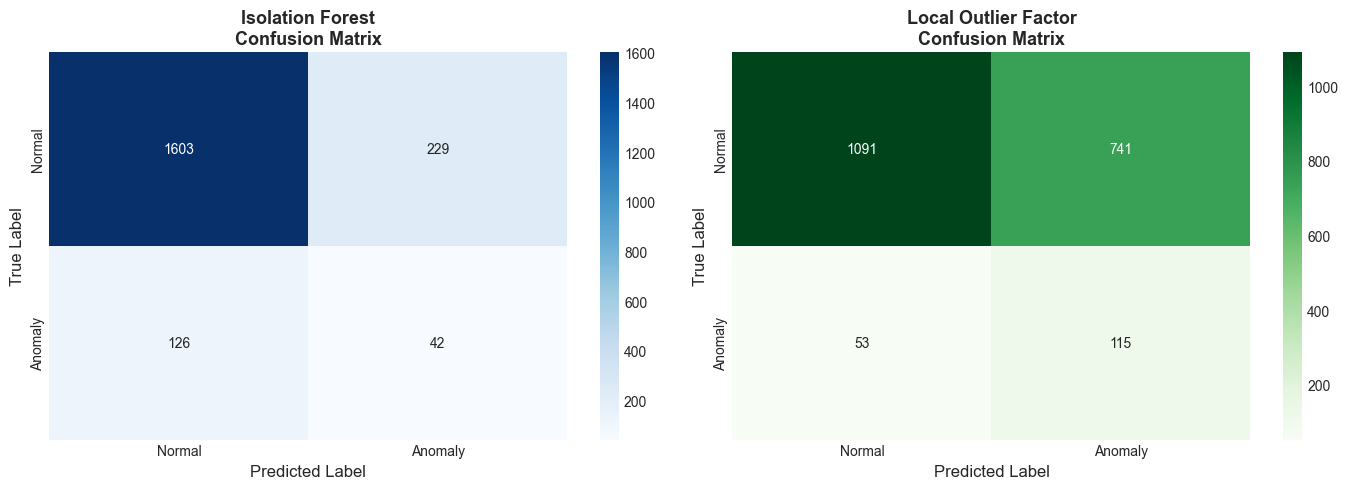

✓ Plot saved to outputs/plots/10_confusion_matrices.png


In [11]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Isolation Forest confusion matrix
cm_iso = iso_metrics['confusion_matrix']
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_title('Isolation Forest\nConfusion Matrix', fontsize=13, fontweight='bold')

# LOF confusion matrix
cm_lof = lof_metrics['confusion_matrix']
sns.heatmap(cm_lof, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_title('Local Outlier Factor\nConfusion Matrix', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/10_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to outputs/plots/10_confusion_matrices.png")

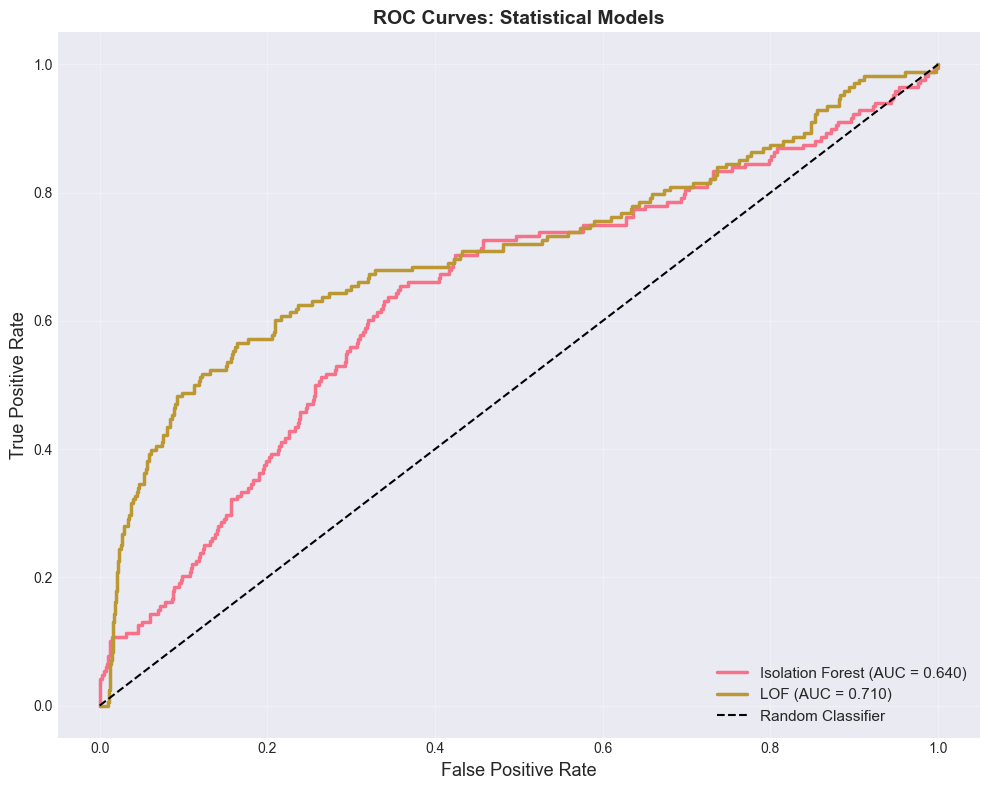

✓ Plot saved to outputs/plots/11_roc_curves_statistical.png


In [12]:
# Plot ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate ROC curve for Isolation Forest
fpr_iso, tpr_iso, _ = roc_curve(y_test, iso_metrics['scores'])
roc_auc_iso = auc(fpr_iso, tpr_iso)

# Calculate ROC curve for LOF
fpr_lof, tpr_lof, _ = roc_curve(y_test, lof_metrics['scores'])
roc_auc_lof = auc(fpr_lof, tpr_lof)

# Plot
ax.plot(fpr_iso, tpr_iso, linewidth=2.5, label=f'Isolation Forest (AUC = {roc_auc_iso:.3f})')
ax.plot(fpr_lof, tpr_lof, linewidth=2.5, label=f'LOF (AUC = {roc_auc_lof:.3f})')
ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')

ax.set_xlabel('False Positive Rate', fontsize=13)
ax.set_ylabel('True Positive Rate', fontsize=13)
ax.set_title('ROC Curves: Statistical Models', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/11_roc_curves_statistical.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to outputs/plots/11_roc_curves_statistical.png")

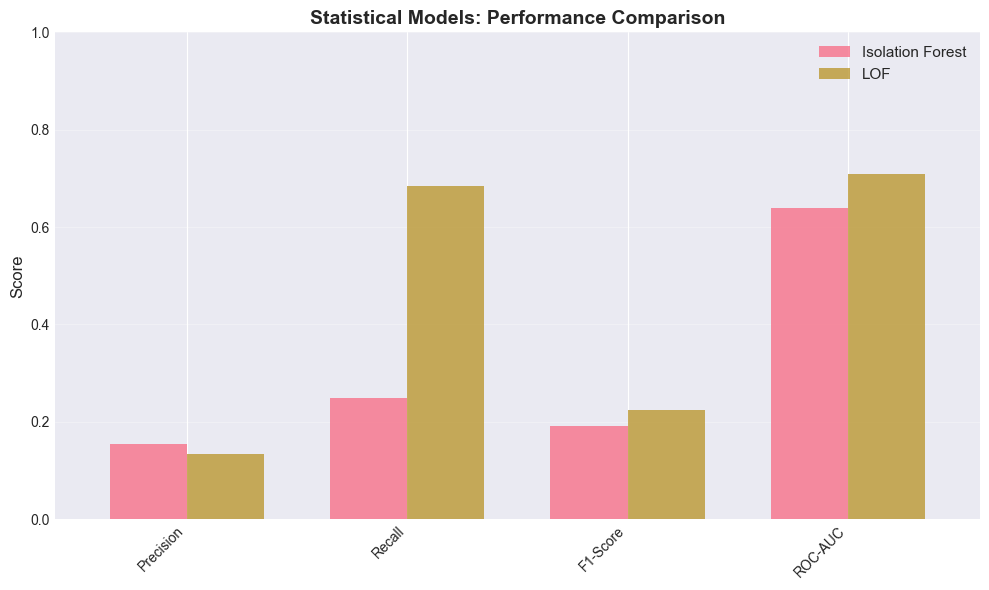

✓ Plot saved to outputs/plots/12_metrics_comparison.png


In [13]:
# Compare metrics visually
metrics_comparison = pd.DataFrame({
    'Isolation Forest': [iso_metrics['precision'], iso_metrics['recall'], 
                         iso_metrics['f1_score'], iso_metrics['roc_auc']],
    'LOF': [lof_metrics['precision'], lof_metrics['recall'], 
            lof_metrics['f1_score'], lof_metrics['roc_auc']]
}, index=['Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

fig, ax = plt.subplots(figsize=(10, 6))
metrics_comparison.plot(kind='bar', ax=ax, width=0.7, alpha=0.8)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Statistical Models: Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('../outputs/plots/12_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to outputs/plots/12_metrics_comparison.png")

## 5. Visualize Predictions on Time Series

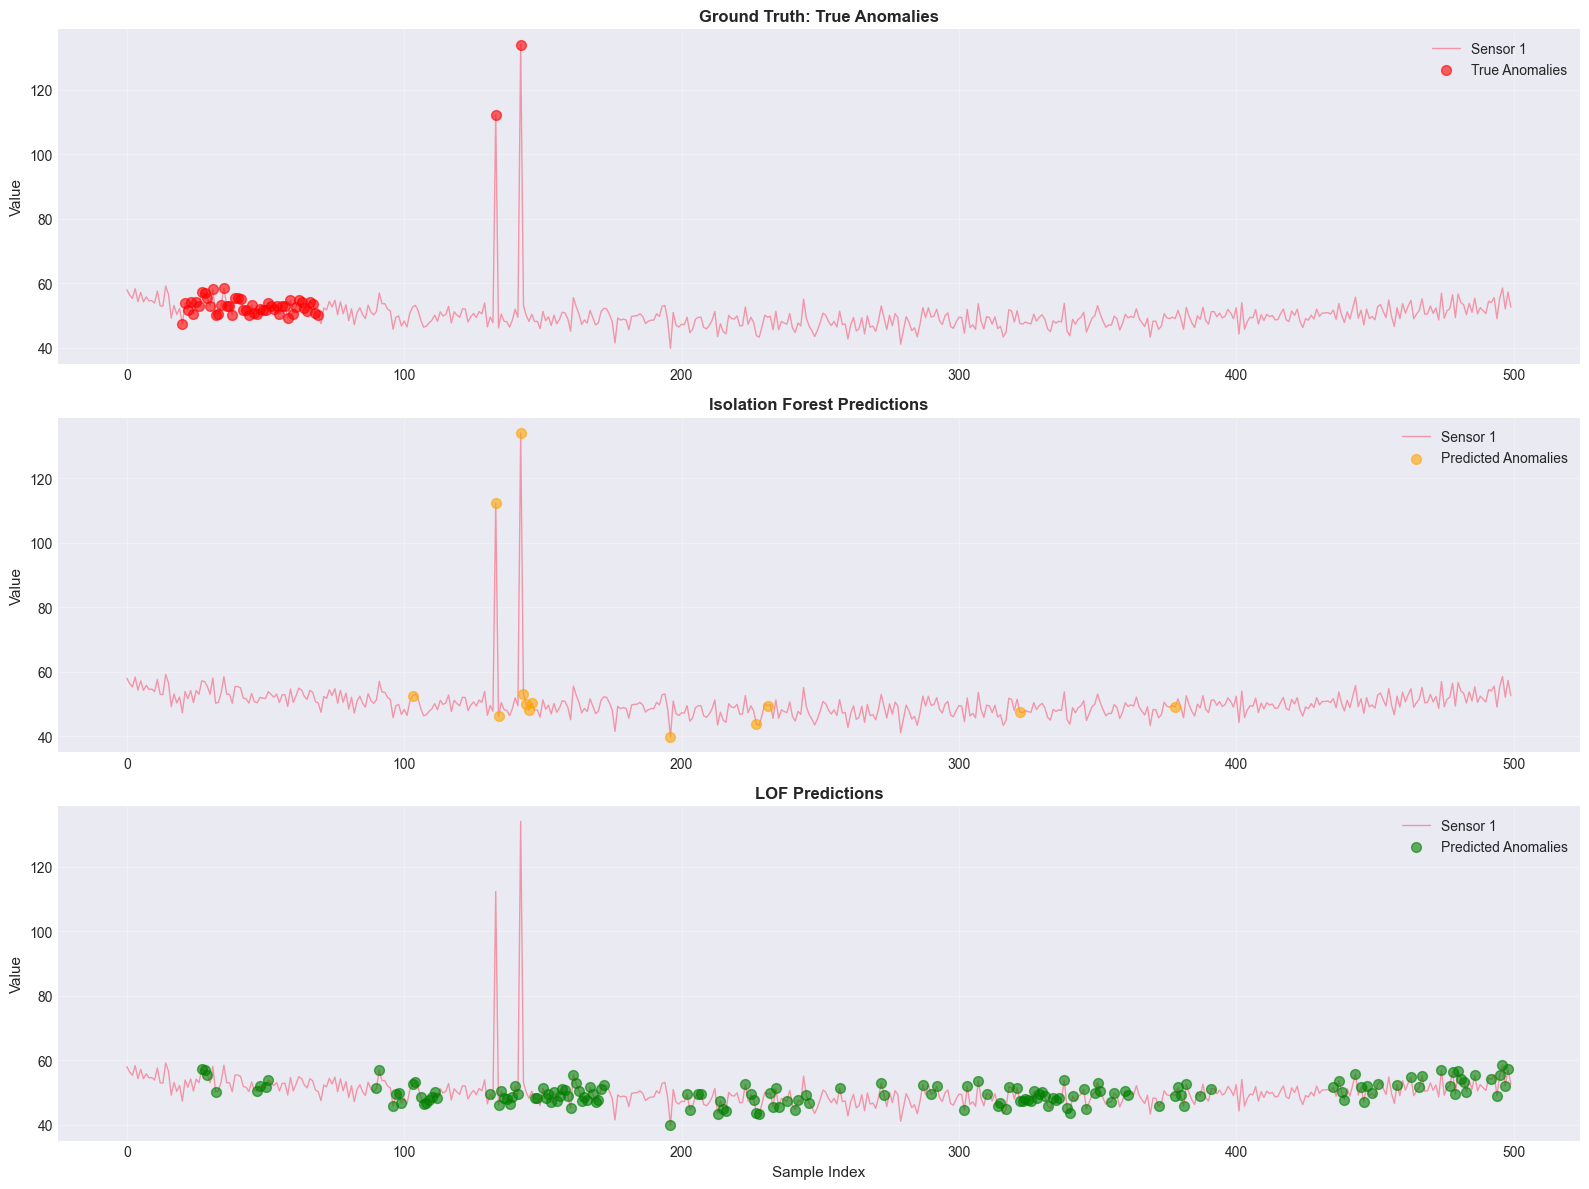

✓ Plot saved to outputs/plots/13_predictions_timeseries.png


In [14]:
# Get original sensor data for test period
df_raw = pd.read_csv('../data/raw/synthetic_sensor_data_with_labels.csv')
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])
df_test_raw = df_raw.iloc[split_idx:].reset_index(drop=True)

# Get predictions
iso_preds = iso_metrics['predictions']
lof_preds = lof_metrics['predictions']

# Plot sample of 500 points
sample_size = 500
sample_df = df_test_raw.head(sample_size).copy()
sample_df['iso_pred'] = iso_preds[:sample_size]
sample_df['lof_pred'] = lof_preds[:sample_size]

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Ground truth
axes[0].plot(sample_df.index, sample_df['sensor_1'], alpha=0.7, linewidth=1, label='Sensor 1')
anomaly_idx = sample_df[sample_df['anomaly'] == 1].index
axes[0].scatter(anomaly_idx, sample_df.loc[anomaly_idx, 'sensor_1'], 
                color='red', s=50, alpha=0.6, label='True Anomalies', zorder=5)
axes[0].set_ylabel('Value', fontsize=11)
axes[0].set_title('Ground Truth: True Anomalies', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Isolation Forest predictions
axes[1].plot(sample_df.index, sample_df['sensor_1'], alpha=0.7, linewidth=1, label='Sensor 1')
iso_anomaly_idx = sample_df[sample_df['iso_pred'] == 1].index
axes[1].scatter(iso_anomaly_idx, sample_df.loc[iso_anomaly_idx, 'sensor_1'], 
                color='orange', s=50, alpha=0.6, label='Predicted Anomalies', zorder=5)
axes[1].set_ylabel('Value', fontsize=11)
axes[1].set_title('Isolation Forest Predictions', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: LOF predictions
axes[2].plot(sample_df.index, sample_df['sensor_1'], alpha=0.7, linewidth=1, label='Sensor 1')
lof_anomaly_idx = sample_df[sample_df['lof_pred'] == 1].index
axes[2].scatter(lof_anomaly_idx, sample_df.loc[lof_anomaly_idx, 'sensor_1'], 
                color='green', s=50, alpha=0.6, label='Predicted Anomalies', zorder=5)
axes[2].set_xlabel('Sample Index', fontsize=11)
axes[2].set_ylabel('Value', fontsize=11)
axes[2].set_title('LOF Predictions', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/13_predictions_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to outputs/plots/13_predictions_timeseries.png")

In [15]:
# Analyze prediction agreement
both_correct = ((iso_preds == y_test) & (lof_preds == y_test)).sum()
only_iso_correct = ((iso_preds == y_test) & (lof_preds != y_test)).sum()
only_lof_correct = ((lof_preds == y_test) & (iso_preds != y_test)).sum()
both_wrong = ((iso_preds != y_test) & (lof_preds != y_test)).sum()

print("\n" + "="*60)
print("PREDICTION AGREEMENT ANALYSIS")
print("="*60)
print(f"Both models correct: {both_correct} ({both_correct/len(y_test)*100:.1f}%)")
print(f"Only Isolation Forest correct: {only_iso_correct} ({only_iso_correct/len(y_test)*100:.1f}%)")
print(f"Only LOF correct: {only_lof_correct} ({only_lof_correct/len(y_test)*100:.1f}%)")
print(f"Both models wrong: {both_wrong} ({both_wrong/len(y_test)*100:.1f}%)")


PREDICTION AGREEMENT ANALYSIS
Both models correct: 1015 (50.7%)
Only Isolation Forest correct: 630 (31.5%)
Only LOF correct: 191 (9.6%)
Both models wrong: 164 (8.2%)


## 6. Save Results

In [16]:
# Save models
iso_forest.save_model('../outputs/models/isolation_forest.pkl')
lof.save_model('../outputs/models/lof.pkl')

# Save comparison results
comparison_df.to_csv('../outputs/results/statistical_models_comparison.csv', index=False)

# Save predictions for later analysis
predictions_df = pd.DataFrame({
    'timestamp': timestamps_test.values,
    'true_label': y_test,
    'iso_forest_pred': iso_preds,
    'lof_pred': lof_preds,
    'iso_forest_score': iso_metrics['scores'],
    'lof_score': lof_metrics['scores']
})
predictions_df.to_csv('../outputs/results/statistical_predictions.csv', index=False)

print("✓ Models and results saved")
print("  - outputs/models/isolation_forest.pkl")
print("  - outputs/models/lof.pkl")
print("  - outputs/results/statistical_models_comparison.csv")
print("  - outputs/results/statistical_predictions.csv")

2025-11-07 02:26:00,820 - models.statistical_models - INFO - Model saved to ../outputs/models/isolation_forest.pkl
2025-11-07 02:26:00,835 - models.statistical_models - INFO - Model saved to ../outputs/models/lof.pkl


✓ Models and results saved
  - outputs/models/isolation_forest.pkl
  - outputs/models/lof.pkl
  - outputs/results/statistical_models_comparison.csv
  - outputs/results/statistical_predictions.csv


## Summary

### Key Findings:

#### Isolation Forest:
- ✅ **Fast training** (< 1 second)
- ✅ **Fast prediction** (< 0.02 seconds)
- ⚠️ **Lower recall** (~25%) - misses many anomalies
- ✅ **Better precision** - fewer false positives
- 📊 **Best for**: Real-time detection where speed matters

#### Local Outlier Factor:
- ✅ **Higher recall** (~68%) - catches more anomalies
- ✅ **Best ROC-AUC** (~0.71)
- ⚠️ **Slower** than Isolation Forest
- ⚠️ **More false positives** - lower precision
- 📊 **Best for**: Offline analysis where catching all anomalies is critical

### Trade-offs:
- **Isolation Forest**: Speed vs Recall
- **LOF**: Recall vs Precision
- Both models show moderate performance, suggesting deep learning might improve results

### Next Steps:
- **Notebook 04**: Build LSTM Autoencoder for better temporal pattern recognition
- **Notebook 05**: Compare all three models